## Lunar lander TD-0 with linear regression

In [ ]:
import gym
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numba import njit

In [8]:
np.set_printoptions(linewidth=200)
%config InlineBackend.figure_format = "retina"
sns.set_palette("colorblind")

In [9]:
# env = gym.make("LunarLander-v2", render_mode="human")
env = gym.make("LunarLander-v2")
# env  = gym.make("MountainCar-v0")
observation, info = env.reset(seed=314)

## Single run

In [10]:
n_steps = 200
all_rewards = np.zeros(n_steps)
for t in range(n_steps):
    # action = env.action_space.sample()  # this is where you would insert your policy
    action = 0
    observation, reward, terminated, truncated, info = env.step(action)
    all_rewards[t] = reward
    print(action, end=" ")
    
    if terminated or truncated:
        observation, info = env.reset()
        break

print(f"\n{all_rewards.sum()}")
env.close()

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
-93.05003848484264


/Users/gerardoduran/mambaforge/envs/py310/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


## The action-value function

$$
    q(s, a, {\bf w}) = {\bf w}_a^\intercal\phi(s)
$$

In [11]:
actions = 4

In [12]:
W = np.zeros((4, 8))

In [124]:
def phi(s):
    return s

def action_value(W, s, a):
    w = W[a]
    return w @ phi(s)

In [129]:
np.random.seed(314)
W = np.random.randn(actions, 8)

In [126]:
def update_qweights(W, s, a, r, s_next, a_next, gamma):
    """
    Update weights using SARSA algorithm
    """
    w = W[a]
    td_err = r + gamma * action_value(W, s_next, a_next) - action_value(W, s, a)

In [119]:
n_steps = 500
all_rewards = np.zeros(n_steps)
env = gym.make("LunarLander-v2")
observation, info = env.reset(seed=314)

observations = np.zeros((n_steps, 8))
for t in range(n_steps):
    action = env.action_space.sample()  # this is where you would insert your policy
    # action = 0
    observation, reward, terminated, truncated, info = env.step(action)
    all_rewards[t] = reward
    print(action, end=" ")

    observations[t] = observation

    if terminated or truncated:
        observation, info = env.reset()

print(f"\n{all_rewards.sum()}")
env.close()

1 3 2 1 2 0 1 3 0 0 0 0 1 1 2 2 3 2 0 2 2 3 0 3 1 3 3 1 2 2 0 3 2 0 0 3 1 1 0 0 0 2 3 3 3 3 0 2 3 1 3 2 3 1 3 1 2 3 0 3 2 0 0 0 3 2 0 3 3 2 1 3 3 2 0 0 0 1 1 2 1 1 2 3 1 1 1 1 3 0 2 0 0 3 0 0 3 0 3 3 2 2 0 3 0 1 3 0 0 0 2 2 2 0 3 2 2 0 1 2 0 3 2 3 3 2 1 2 1 1 2 0 3 0 1 2 2 2 3 1 2 1 2 3 2 2 1 2 3 1 0 2 3 2 3 0 1 3 3 0 0 2 2 2 2 0 3 0 1 2 1 2 3 0 3 2 0 1 0 0 2 2 1 0 3 3 1 0 3 1 3 3 3 1 1 0 0 3 3 3 3 3 0 2 1 0 3 3 3 3 0 3 0 0 1 0 0 3 3 3 3 3 2 0 3 3 0 2 0 3 0 1 3 1 3 2 3 2 2 0 1 2 0 3 0 3 2 1 0 0 1 3 1 3 2 0 3 3 1 3 1 0 3 1 1 3 1 1 3 2 2 0 3 3 2 3 0 3 3 2 3 1 0 0 3 1 2 2 1 1 1 1 2 2 2 1 3 0 2 2 3 0 3 1 3 3 1 2 0 3 3 1 0 0 2 0 0 2 3 1 2 2 3 1 1 0 1 1 0 3 1 3 0 2 0 3 3 0 3 2 0 1 0 1 3 2 2 3 3 1 0 1 0 3 0 1 2 0 1 2 1 1 2 1 3 3 1 2 0 2 2 0 3 2 2 3 1 0 2 0 1 1 0 0 3 2 1 3 2 2 0 1 2 2 3 0 1 0 3 2 1 0 3 3 1 0 2 1 0 0 2 1 0 0 3 1 3 0 3 0 3 3 2 2 0 1 0 0 0 0 1 1 2 1 0 3 1 1 1 1 2 0 1 2 1 2 1 2 3 1 0 3 0 3 0 1 3 1 1 0 2 2 2 1 0 2 3 2 3 0 1 3 2 2 2 3 3 3 0 3 0 3 0 0 2 1 0 3 3 1 2 3 1 3 1 0 1 0 0 1 

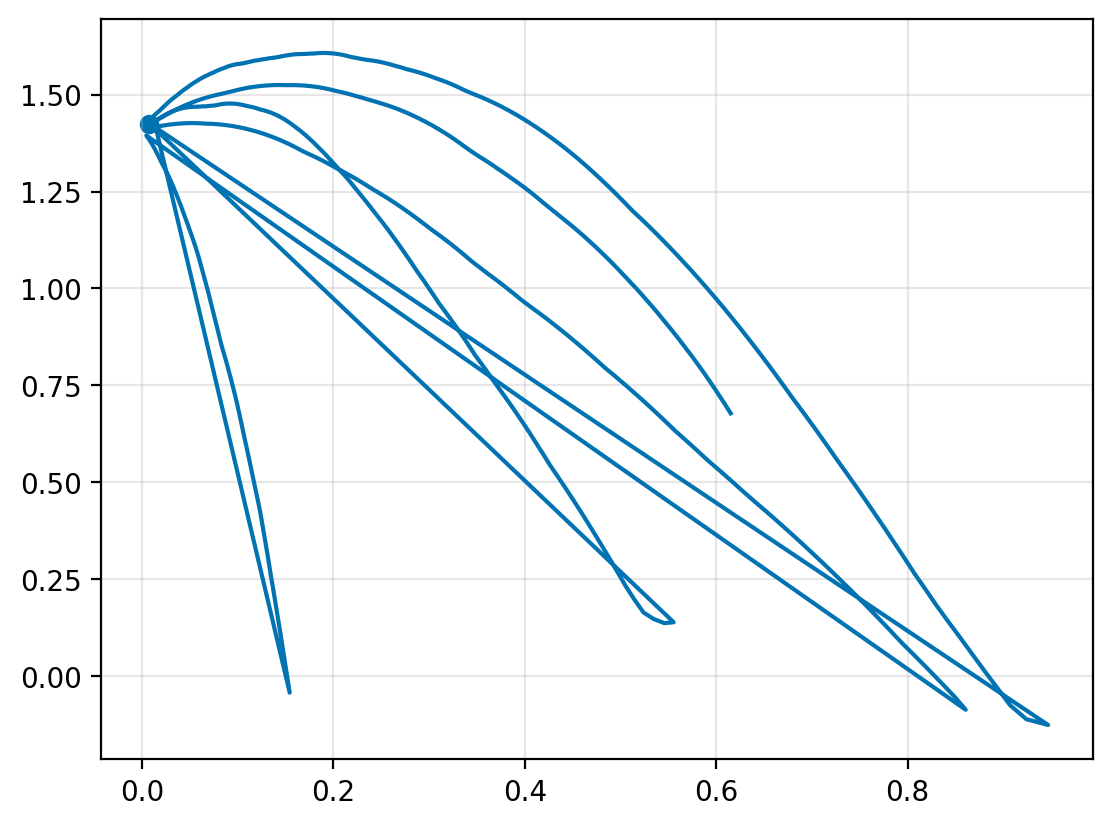

In [120]:
plt.plot(*observations[:, :2].T)
plt.scatter(*observations[0, :2])
plt.grid(alpha=0.3)

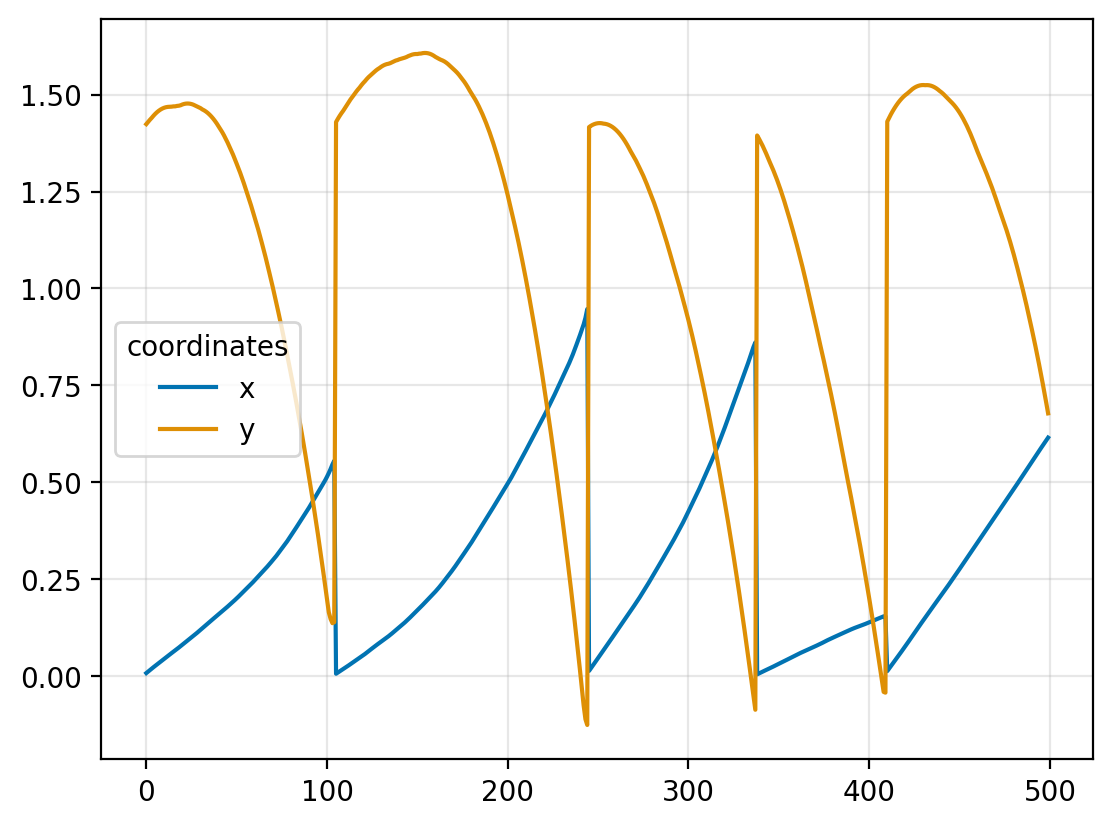

In [121]:
plt.plot(observations[:, :2], label=["x", "y"])
plt.legend(title="coordinates")
plt.grid(alpha=0.3)

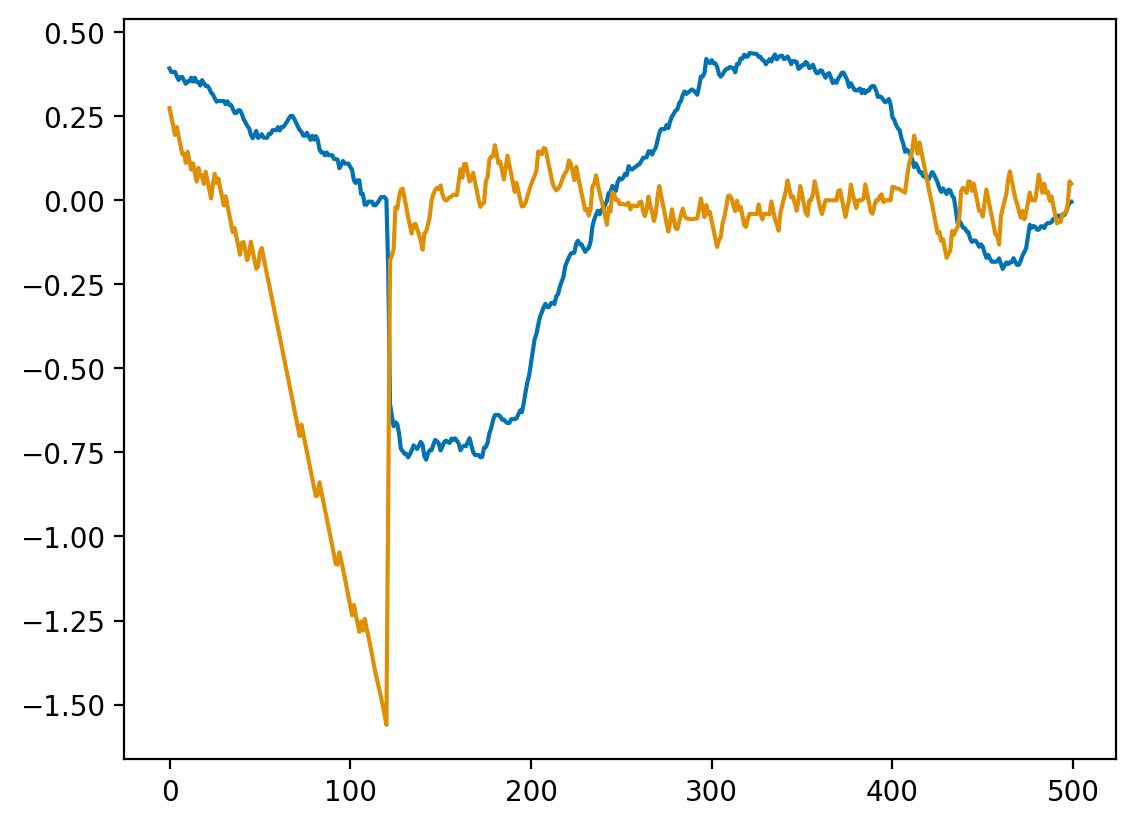

In [117]:
plt.plot(observations[:, 2:4])

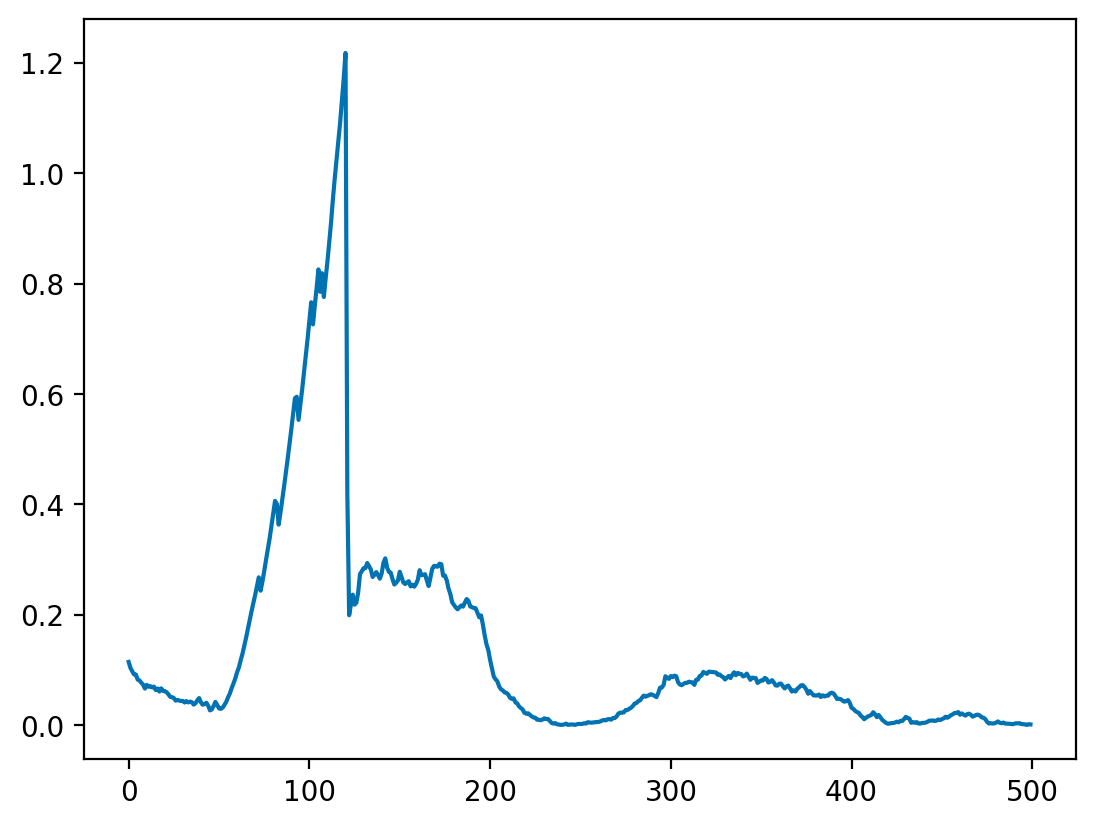

In [118]:
vel = np.power(observations[:, 2:4], 2).mean(axis=1)
plt.plot(vel)